# Multiple Regression to Predict Manhattan Rent

__Project Summary:__

The aim of this project was to predict Manhattan rent prices using multiple linear regression, leveraging a dataset provided by StreetEasy, a reputable real estate company. The dataset included various features that can influence rent prices.

Features: The dataset included an array of pertinent features that influence rent prices, including:

* Number of bedrooms
* Number of bathrooms
* Square footage of the apartment
* Proximity to subway stations
* Floor level within the building
* Age of the building
* Amenities such as a doorman, gym, dishwasher, etc.

In [453]:
import pandas as pd 
import numpy as np

In [454]:
data = pd.read_csv("data/manhattan.csv")

In [455]:
data.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.00,1,480,9,2.00,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.00,2,2000,4,1.00,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.00,1,916,2,51.00,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.00,1,975,3,8.00,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.00,2,4800,3,4.00,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [456]:
data = data.drop(columns=["neighborhood", "borough","rental_id"])

### Exploratory Data Analysis (EDA)

In [457]:
data.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,"3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00","3,539.00"
mean,"5,138.94",1.35,1.37,939.73,4.97,11.91,51.99,0.40,0.15,0.16,0.28,0.29,0.19,0.06,0.17
std,"3,162.82",0.97,0.60,477.95,5.51,10.96,39.38,0.49,0.36,0.37,0.45,0.46,0.39,0.23,0.38
min,"1,300.00",0.00,0.00,250.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"3,150.00",1.00,1.00,613.00,2.00,4.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"4,000.00",1.00,1.00,800.00,4.00,8.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"6,000.00",2.00,2.00,"1,141.00",6.00,17.00,90.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
max,"20,000.00",5.00,5.00,"4,800.00",43.00,83.00,180.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.11.2


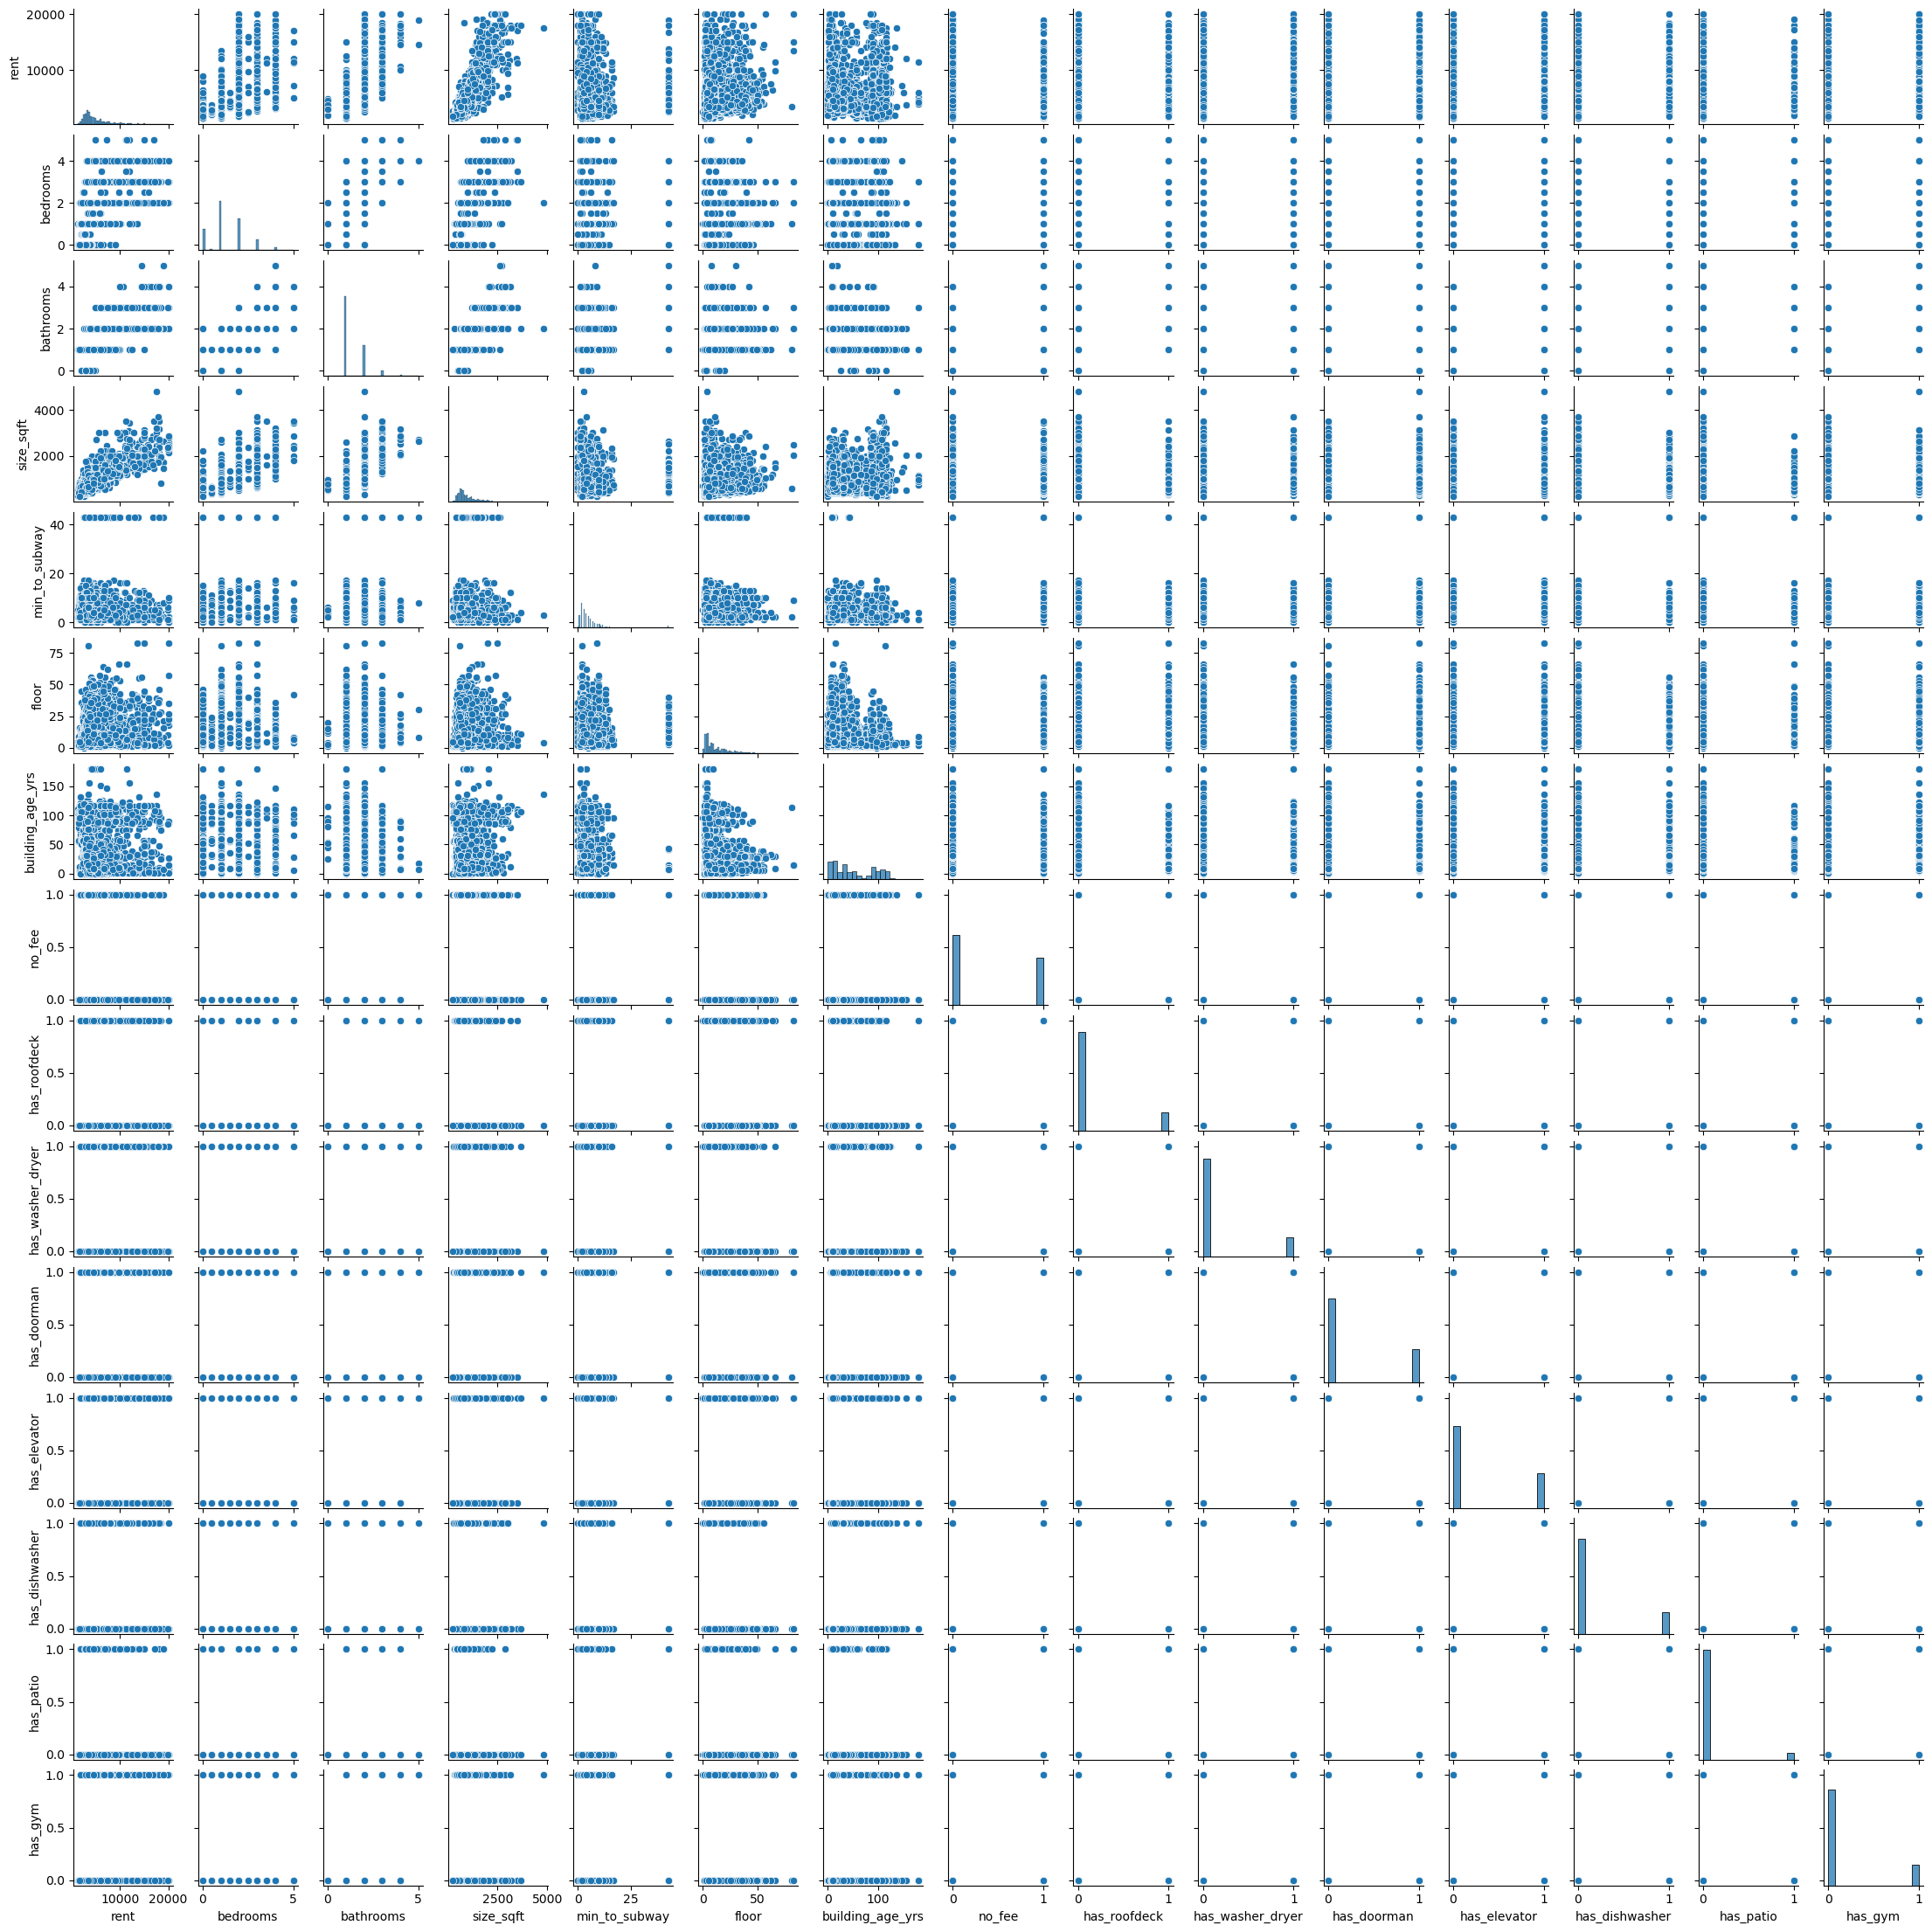

In [39]:
sns.pairplot(data, height = 1.5);
plt.show()

In [40]:
feature_study = data[["rent","no_fee","has_roofdeck","has_washer_dryer","has_doorman","has_elevator","has_dishwasher","has_patio","has_gym"]]

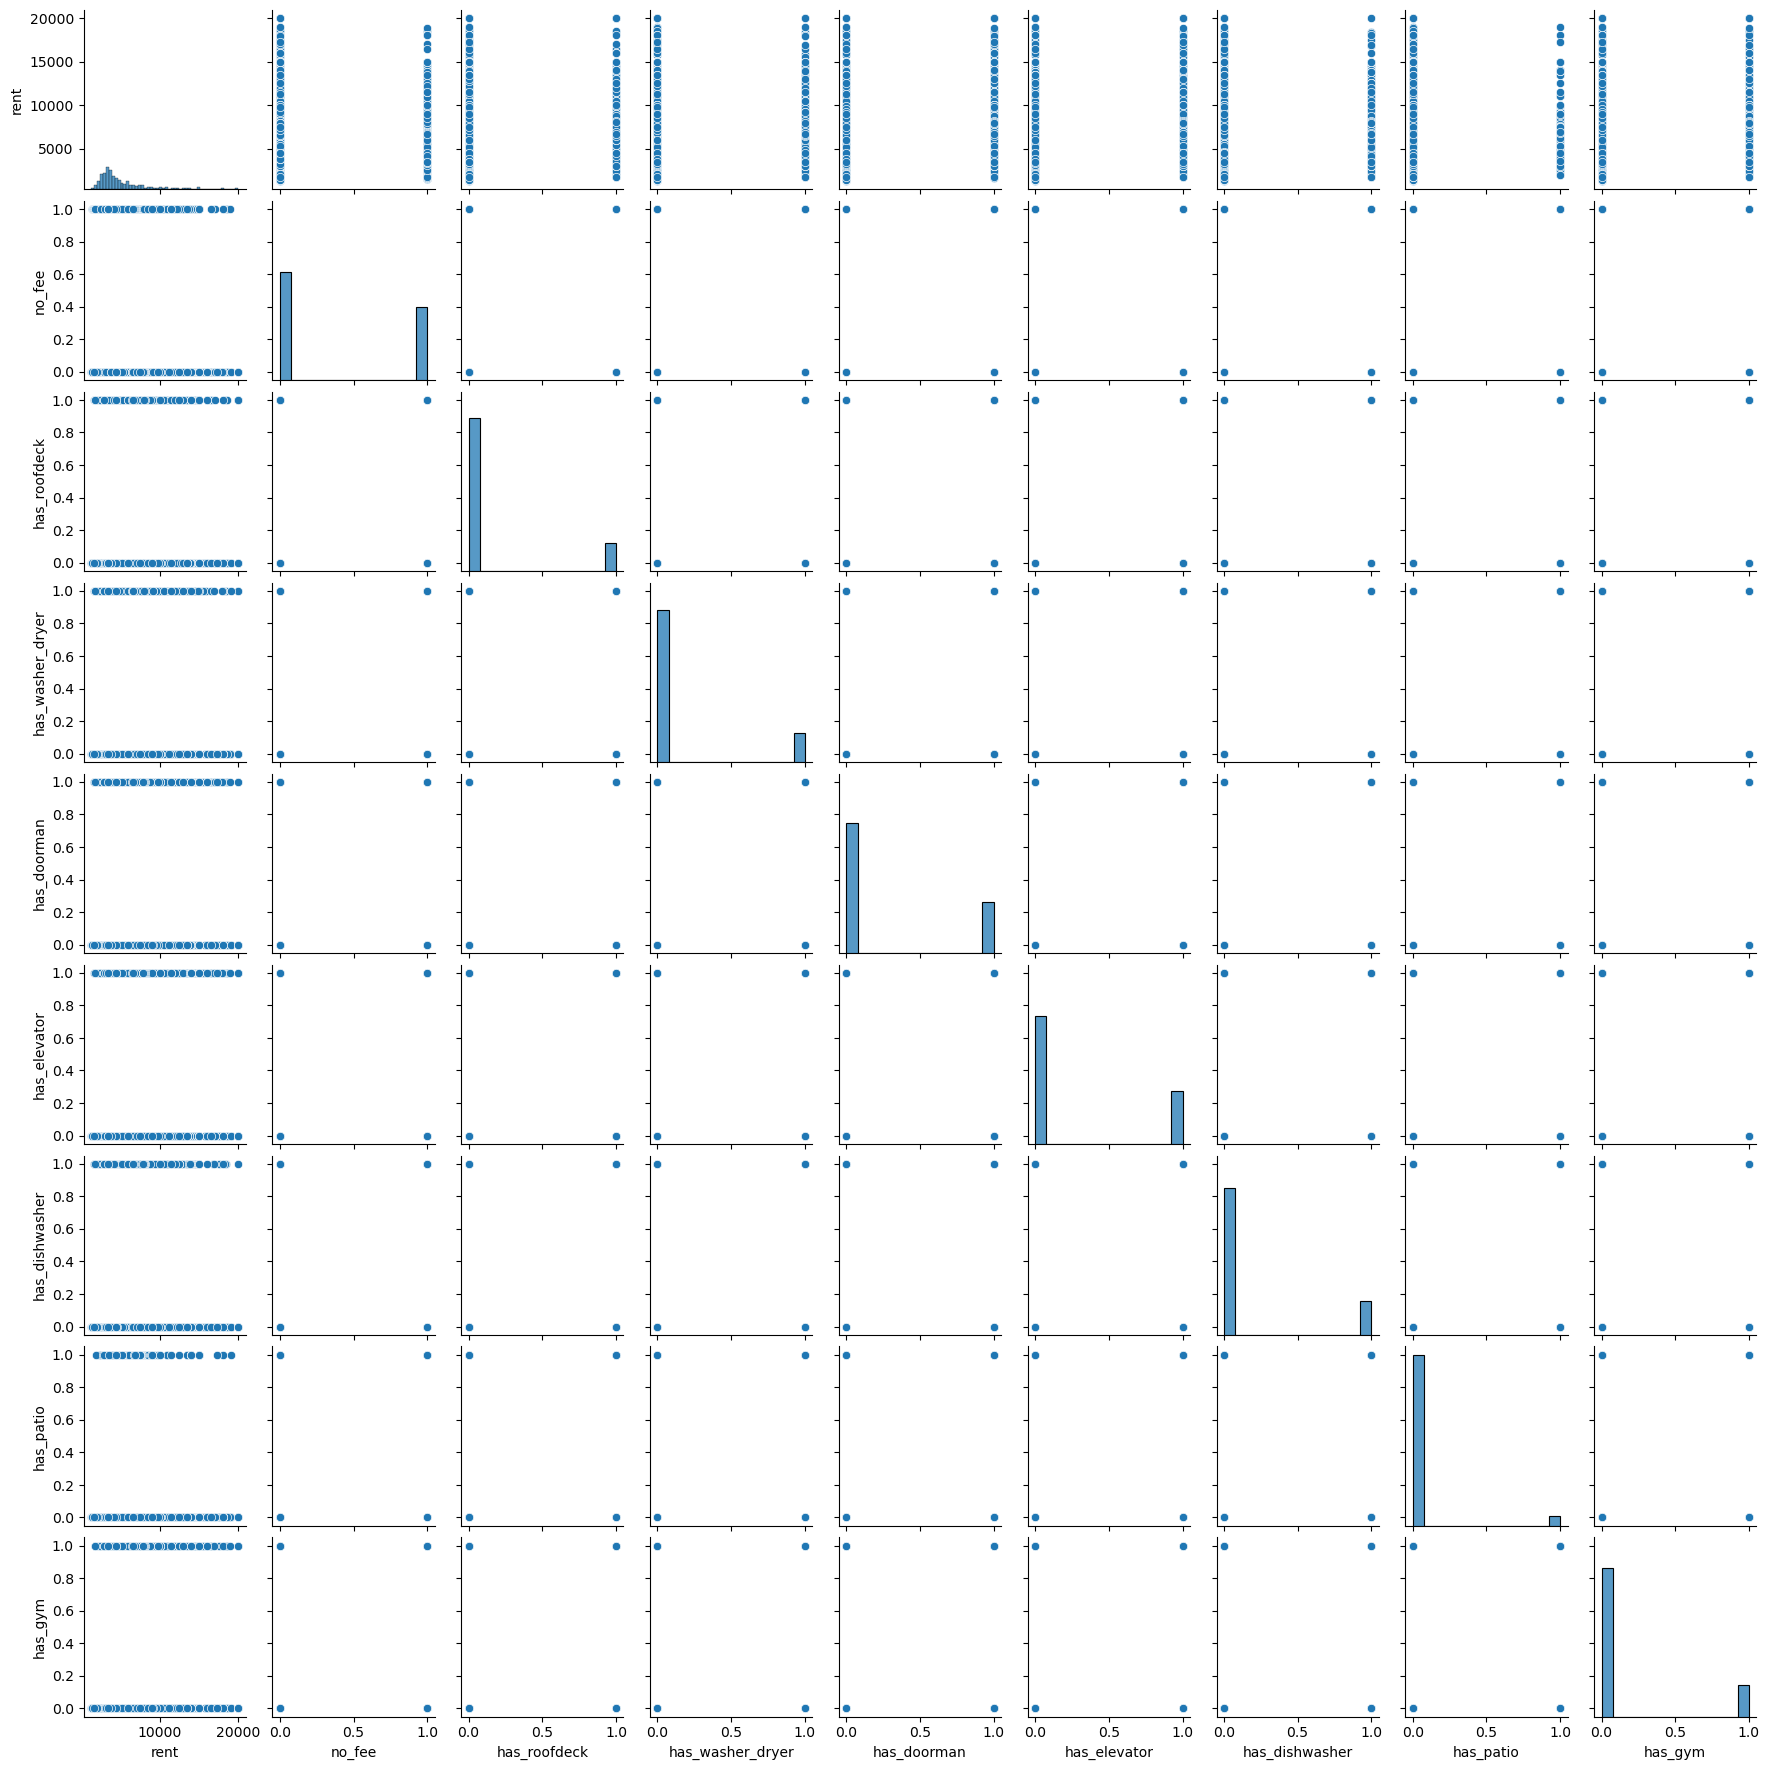

In [41]:
sns.pairplot(feature_study, height = 2.0);
plt.show()

### Correlation Analysis and Feature Selection

In [42]:
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
data.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.00,0.64,0.77,0.86,0.04,0.22,-0.13,-0.10,0.04,0.05,0.03,0.05,0.05,0.03,0.04
bedrooms,0.64,1.00,0.72,0.77,0.08,0.04,0.04,-0.10,0.00,0.01,-0.02,-0.01,0.01,0.00,-0.00
bathrooms,0.77,0.72,1.00,0.80,0.09,0.13,-0.10,-0.06,0.02,0.03,0.01,0.02,0.04,0.04,0.03
size_sqft,0.86,0.77,0.80,1.00,0.04,0.11,0.01,-0.14,0.02,0.04,0.03,0.04,0.05,0.02,0.03
min_to_subway,0.04,0.08,0.09,0.04,1.00,0.08,-0.18,0.08,-0.02,-0.00,-0.01,-0.00,-0.01,0.00,-0.00
floor,0.22,0.04,0.13,0.11,0.08,1.00,-0.39,0.10,0.06,0.04,0.10,0.07,0.00,0.06,0.07
building_age_yrs,-0.13,0.04,-0.10,0.01,-0.18,-0.39,1.00,-0.22,-0.04,-0.03,-0.05,-0.06,-0.03,-0.05,-0.06
no_fee,-0.10,-0.10,-0.06,-0.14,0.08,0.10,-0.22,1.00,-0.10,-0.07,-0.18,-0.16,-0.08,-0.05,-0.10
has_roofdeck,0.04,0.00,0.02,0.02,-0.02,0.06,-0.04,-0.10,1.00,0.31,0.49,0.52,0.33,0.12,0.56
has_washer_dryer,0.05,0.01,0.03,0.04,-0.00,0.04,-0.03,-0.07,0.31,1.00,0.33,0.38,0.46,0.14,0.35


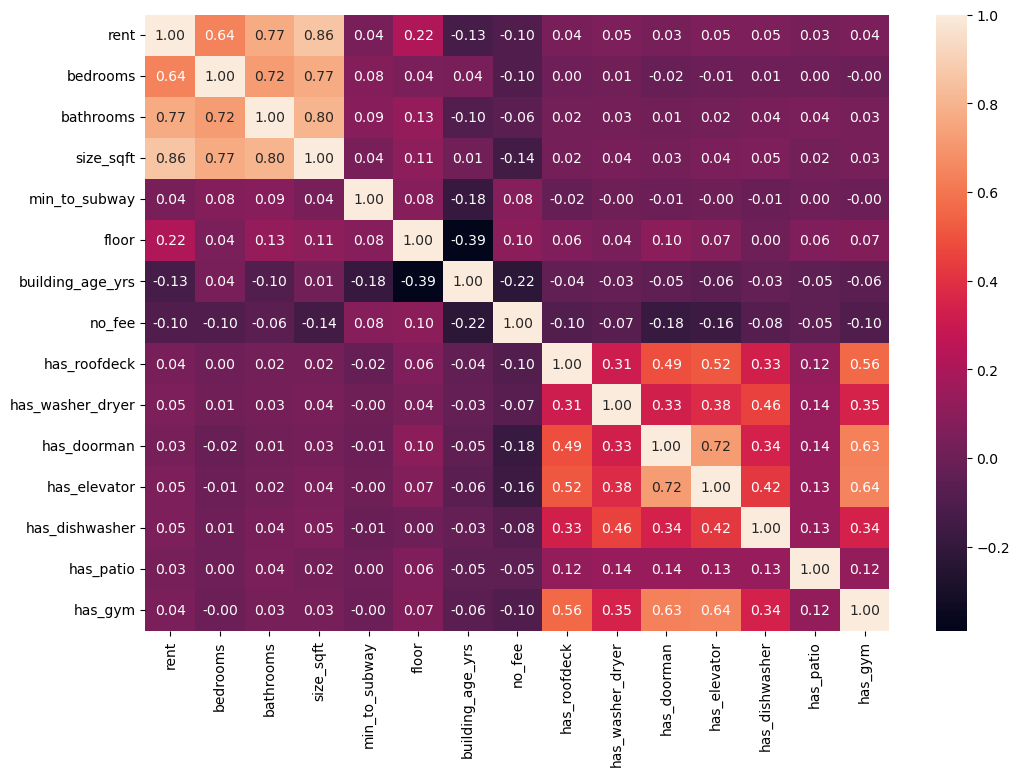

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

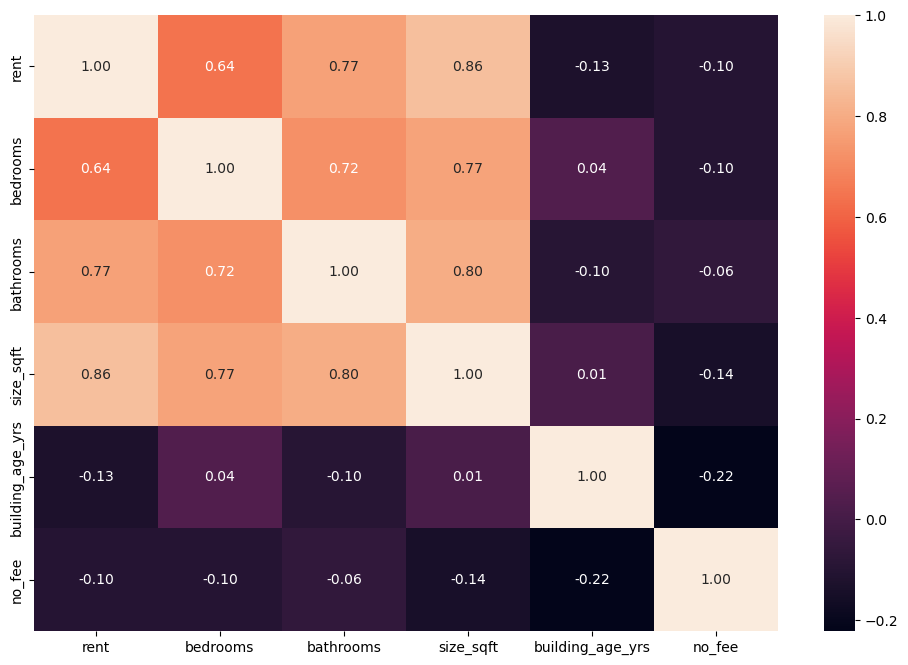

In [46]:
feature_study = data[["rent","bedrooms", "bathrooms", "size_sqft", "building_age_yrs","no_fee"]]
plt.figure(figsize=(12,8))
sns.heatmap(feature_study.corr(), annot=True, fmt=".2f")
plt.show()

### Linear Regression with Scikit-Learn

In [458]:
data.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.00,1,480,9,2.00,17,1,1,0,0,1,1,0,1
1,11500,2.00,2,2000,4,1.00,96,0,0,0,0,0,0,0,0
2,4500,1.00,1,916,2,51.00,29,0,1,0,1,1,1,0,0
3,4795,1.00,1,975,3,8.00,31,0,0,0,1,1,1,0,1
4,17500,2.00,2,4800,3,4.00,136,0,0,0,1,1,1,0,1


In [459]:
X = data.drop(columns=["rent"])
y = data.rent

In [460]:
X.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.00,1,480,9,2.00,17,1,1,0,0,1,1,0,1
1,2.00,2,2000,4,1.00,96,0,0,0,0,0,0,0,0
2,1.00,1,916,2,51.00,29,0,1,0,1,1,1,0,0
3,1.00,1,975,3,8.00,31,0,0,0,1,1,1,0,1
4,2.00,2,4800,3,4.00,136,0,0,0,1,1,1,0,1


In [461]:
y.head()

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64

In [462]:
X.shape

(3539, 14)

In [463]:
y.shape

(3539,)

In [464]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [465]:
model = LinearRegression()

In [466]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2)

In [467]:
model.fit(x_train, y_train)

LinearRegression()

In [468]:
model.coef_

array([-347.15065811, 1056.5827825 ,    5.12771545,  -20.68437046,
         22.53441854,   -7.65715351, -111.78734509,  -36.65725676,
        197.88845919, -259.61785878,  154.06321903,  -48.56482514,
         16.23616759,   -3.72500036])

In [469]:
model.intercept_

-373.72951917642877

### Performance Evaluation of Regression Model

In [470]:
y_train_pred = model.predict(x_train)

In [471]:
y_test_pred = model.predict(x_test)

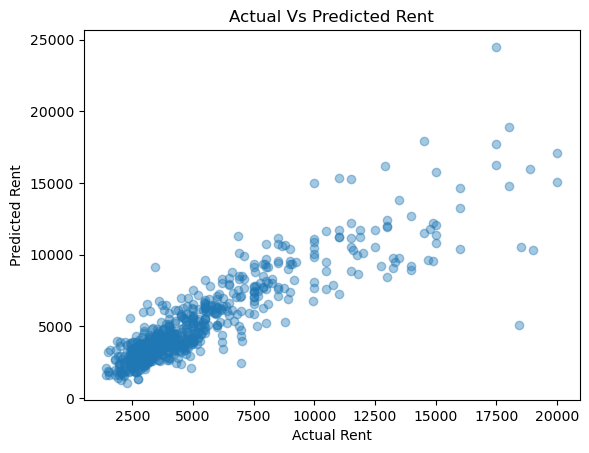

In [472]:
# Create a scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")

# Create a title
plt.title("Actual Vs Predicted Rent")

# Show the plot
plt.show()

#### Residual Analysis

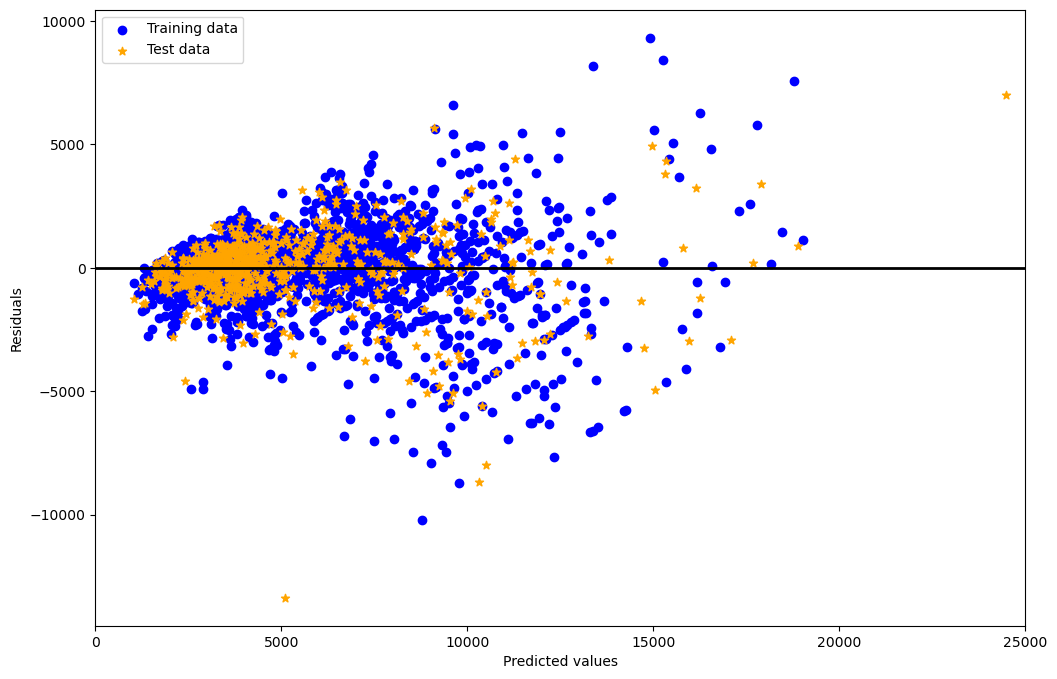

In [473]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=25000, lw=2, color='k')
plt.xlim([0, 25000])
plt.show()

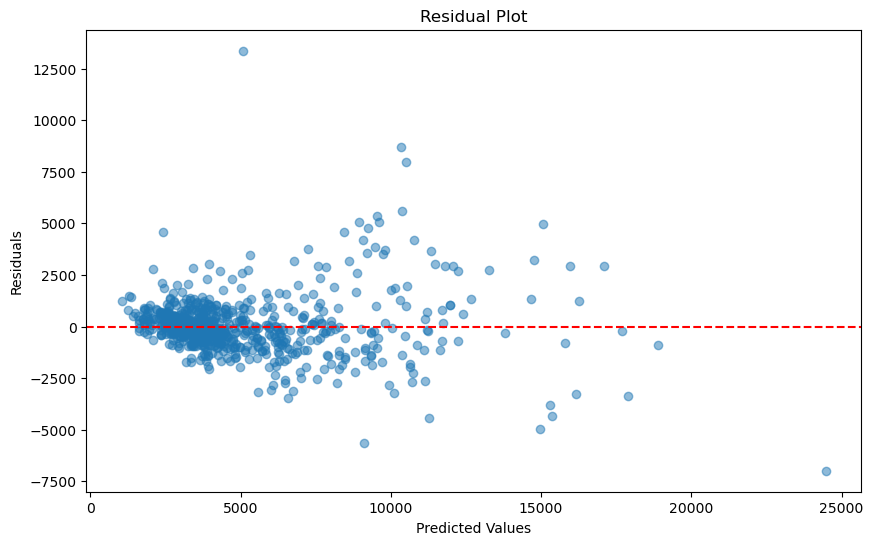

In [474]:
# Residual plot to check for homoscedasticity
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

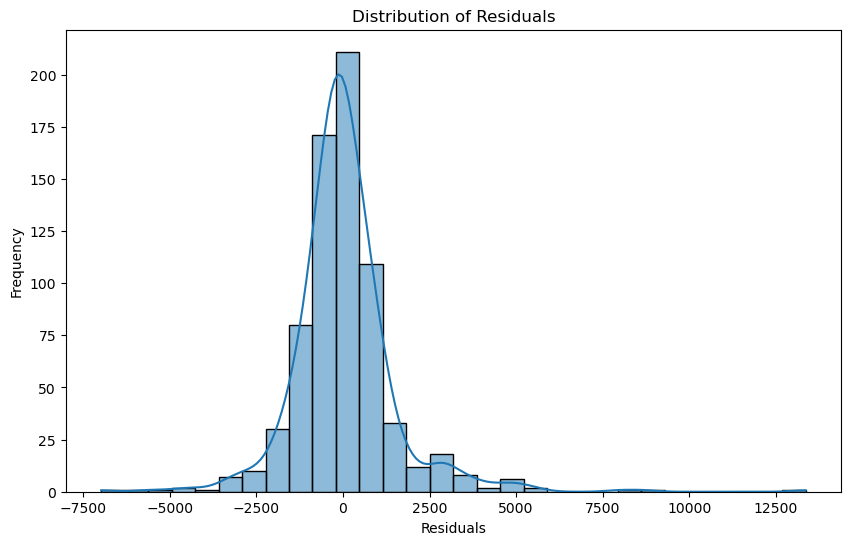

In [475]:
# Distribution of residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

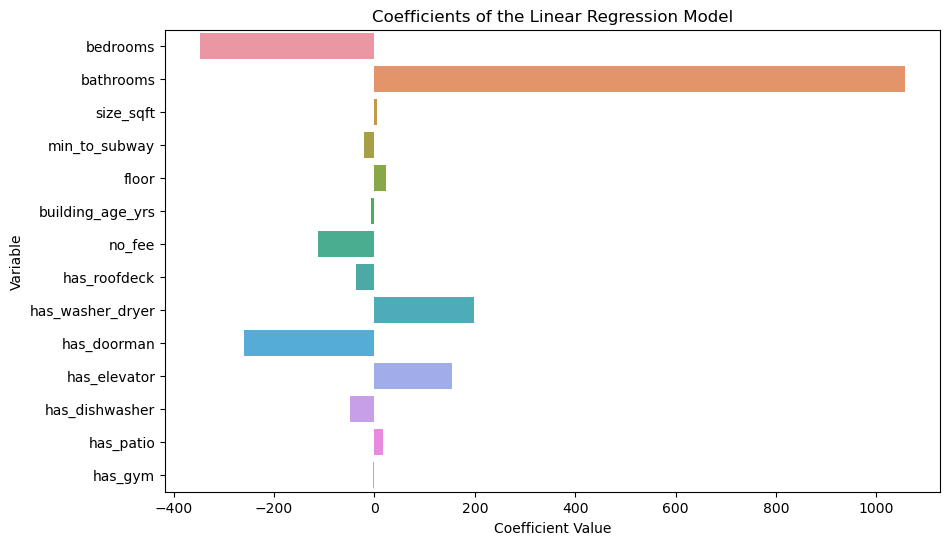

In [476]:
# Coefficient plot
coef_names = ["bedrooms","bathrooms","size_sqft","min_to_subway","floor","building_age_yrs","no_fee","has_roofdeck","has_washer_dryer","has_doorman","has_elevator","has_dishwasher","has_patio","has_gym"]
plt.figure(figsize=(10, 6))
sns.barplot(x= model.coef_, y=coef_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Coefficients of the Linear Regression Model")
plt.show()

#### Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [477]:
MSE_train = mean_squared_error(y_train, y_train_pred)
print("MSE_train:", round(MSE_train,2))

MSE_train: 2214818.5


In [478]:
MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE_test:", round(MSE_test,2))

MSE_test: 2206801.63


#### Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [479]:
from sklearn.metrics import r2_score

In [480]:
r2_score(y_train, y_train_pred)

0.773623169389273

In [481]:
r2_score(y_test, y_test_pred)

0.7969391215280568

# Predict your rent

You have the flexibility to adjust various input values to estimate the rent for a hypothetical apartment in Manhattan, tailored to your preferences and requirements.

In [482]:
# Plug in the values that apply to you
your_apartment = [[1, 1, 620, 16, 3, 56, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = model.predict(your_apartment)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $3036.86


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Regression Model with less features

We aim to enhance the model's performance by reducing the number of features with low correlation. Let's see if that is the case.

In [483]:
data = pd.read_csv("data/manhattan.csv")

In [484]:
data = data.drop(columns=["min_to_subway","floor","neighborhood", "borough","rental_id","no_fee","has_roofdeck","has_washer_dryer","has_doorman","has_elevator","has_dishwasher","has_patio","has_gym"])

In [485]:
data.head()

,rent,bedrooms,bathrooms,size_sqft,building_age_yrs
0,2550,0.00,1,480,17
1,11500,2.00,2,2000,96
2,4500,1.00,1,916,29
3,4795,1.00,1,975,31
4,17500,2.00,2,4800,136


In [486]:
X = data.drop(columns=["rent"])
y = data.rent

In [487]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix (independent variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [488]:
print(X_scaled)

[[-1.39741035 -0.61179008 -0.96201105 -0.88876267]
 [ 0.66986323  1.05625699  2.2186935   1.11759321]
 [-0.36377356 -0.61179008 -0.04965106 -0.58399975]
 ...
 [-1.39741035 -0.61179008 -1.44330187  1.11759321]
 [-0.36377356 -0.61179008 -0.60418179 -0.9649534 ]
 [-0.36377356 -0.61179008 -0.25890794 -1.09193795]]


In [489]:
y.head()

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64

In [490]:
model = LinearRegression()

In [491]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,train_size = 0.8, test_size = 0.2)

In [492]:
model.fit(x_train, y_train)

LinearRegression()

In [493]:
model.coef_

array([-312.84095289,  719.25742773, 2382.14333523, -360.84486568])

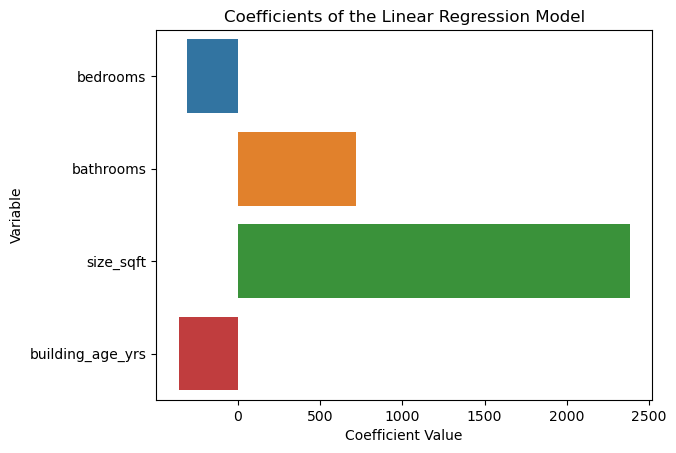

In [494]:
# Coefficient plot
coef_names = ["bedrooms","bathrooms","size_sqft","building_age_yrs"]
sns.barplot(x= model.coef_, y=coef_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Coefficients of the Linear Regression Model")
plt.show()

In [495]:
y_train_pred = model.predict(x_train)

In [496]:
y_test_pred = model.predict(x_test)

In [497]:
print("Train score:")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))

Train score:
0.7654768583749029
Test score:
0.8013294576637588


Observing the results, it's evident that there's minimal improvement in performance. Surprisingly, the test score even showed an enhancement, suggesting that these particular features encapsulate the most significant variance in our model. If computational efficiency is a priority, you may opt for only these features. However, for utmost accuracy and predictive power, utilizing the full set of features is recommended.

#### Linear Regression with one feature

We will assess the model's accuracy by employing a single feature.

In [498]:
X = data.bedrooms.values.reshape(-1,1)
y = data.rent

In [499]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2)
model.fit(x_train, y_train)

LinearRegression()

In [500]:
model.coef_

array([2080.82585112])

In [501]:
print("Train score:")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))

Train score:
0.4106660781580348
Test score:
0.39315939397160005


Observe that with the utilization of just one feature, we are able to account for approximately 40% of the variance.

#### Feature standardization

We will attempt feature standardization to assess its potential impact on improving the model's accuracy.

In [502]:
data = pd.read_csv("data/manhattan.csv")
data = data.drop(columns=["neighborhood", "borough","rental_id"])
data.head(2)

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.00,1,480,9,2.00,17,1,1,0,0,1,1,0,1
1,11500,2.00,2,2000,4,1.00,96,0,0,0,0,0,0,0,0


In [503]:
X = data.drop(columns=["rent"])
y = data.rent

In [504]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix (independent variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [505]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,train_size = 0.8, test_size = 0.2)
model.fit(x_train, y_train)

LinearRegression()

In [506]:
model.coef_

array([-2.35694231e+02,  7.09837126e+02,  2.27446310e+03, -1.00043139e+02,
        2.59927729e+02, -2.90597458e+02, -6.18059698e+01,  2.21857139e+01,
        5.76994051e+01, -7.86477233e+01,  3.46804279e+01, -7.53964991e+00,
       -4.49492443e+01, -4.10506056e-02])

In [507]:
print("Train score:")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))

Train score:
0.7767394990136635
Test score:
0.7882675445743218


In [508]:
MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE_test:", round(MSE_test,2))

MSE_test: 16871600.98


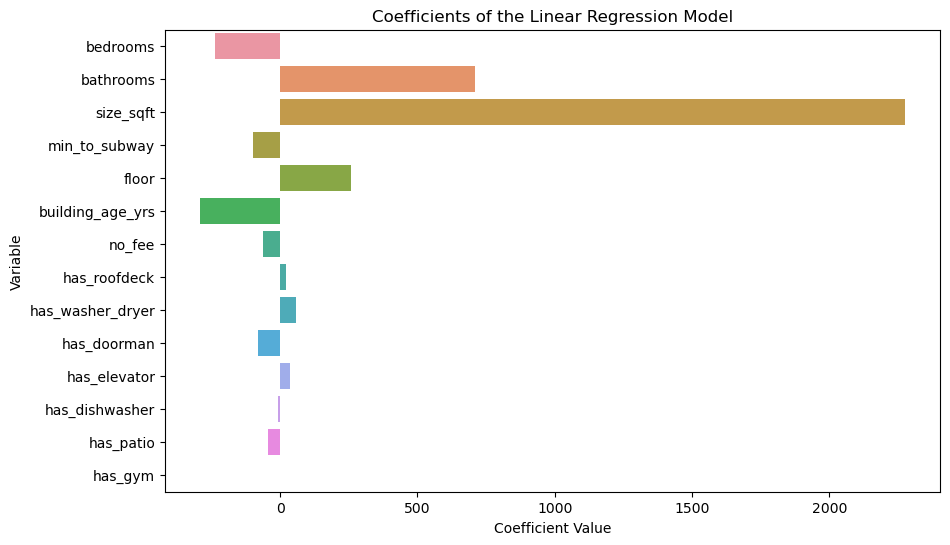

In [509]:
# Coefficient plot
coef_names = ["bedrooms","bathrooms","size_sqft","min_to_subway","floor","building_age_yrs","no_fee","has_roofdeck","has_washer_dryer","has_doorman","has_elevator","has_dishwasher","has_patio","has_gym"]
plt.figure(figsize=(10, 6))
sns.barplot(x= model.coef_, y=coef_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Coefficients of the Linear Regression Model")
plt.show()

Although there are changes in the coefficients, it's worth noting that these alterations haven't translated into an enhancement of the model's overall performance.